# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction <br />
<br />
## [教學目標]
使用並觀察特徵組合, 在計程車費率預測競賽的影響<br />
## [範例重點]
增加精度差與緯度差兩個特徵, 觀察線性迴歸與梯度提升樹的預測結果有什麼影響 <br />
再增加座標距離特徵, 觀察線性迴歸與梯度提升樹的預測結果有什麼影響

In [24]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data = './data/'
df = pd.read_csv(data+'taxi_data1.csv')

train_label = df.fare_amount
df = df.drop(['fare_amount'], axis = 1)
df.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [25]:
df.pickup_datetime = df.pickup_datetime.apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df.pickup_datetime.apply(lambda x:datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df.pickup_datetime.apply(lambda x:datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df.pickup_datetime.apply(lambda x:datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df.pickup_datetime.apply(lambda x:datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df.pickup_datetime.apply(lambda x:datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df.pickup_datetime.apply(lambda x:datetime.datetime.strftime(x, '%S')).astype('int64')

df.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [26]:
df = df.drop(['pickup_datetime'], axis = 1)
train_x = MinMaxScaler().fit_transform(df)
LR = LinearRegression()
print(f' score of LR : {cross_val_score(LR,train_x,train_label,cv=5).mean()} ' )
GBR = GradientBoostingRegressor()
print(f' score of GBR : {cross_val_score(GBR,train_x,train_label,cv=5).mean()} ')

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 score of LR : 0.026876871475636888 
 score of GBR : 0.7114402268775115 


In [27]:
df['lon_diff'] = df.dropoff_longitude - df.pickup_longitude
df['lat_diff'] = df.dropoff_latitude - df.pickup_latitude

df[['lon_diff', 'lat_diff', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].head(5)

,lon_diff,lat_diff,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0.009452,-0.002437,-73.990580,40.761071,-73.981128,40.758634
1,-0.001244,0.018265,-73.988403,40.723431,-73.989647,40.741695
2,0.003756,-0.007222,-74.015785,40.715110,-74.012029,40.707888
3,0.019292,-0.008437,-73.977322,40.787275,-73.958030,40.778838
4,0.007193,0.032170,-73.989683,40.729717,-73.982490,40.761887


In [28]:
train_x = MinMaxScaler().fit_transform(df)
LR = LinearRegression()
print(f' score of LR : {cross_val_score(LR,train_x,train_label,cv=5).mean()} ' )
GBR = GradientBoostingRegressor()
print(f' score of GBR : {cross_val_score(GBR,train_x,train_label,cv=5).mean()} ')

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 score of LR : 0.026887767877869128 
 score of GBR : 0.7965820689158791 


In [29]:
df['distance_2D'] = np.sqrt( df.lon_diff ** 2 + df.lat_diff ** 2 )
df[['distance_2D','lat_diff','lon_diff']].head(5)

,distance_2D,lat_diff,lon_diff
0,0.009761,-0.002437,0.009452
1,0.018307,0.018265,-0.001244
2,0.008140,-0.007222,0.003756
3,0.021056,-0.008437,0.019292
4,0.032964,0.032170,0.007193


In [30]:
train_x = MinMaxScaler().fit_transform(df)
LR = LinearRegression()
print(f' score of LR : {cross_val_score(LR,train_x,train_label,cv=5).mean()} ' )
GBR = GradientBoostingRegressor()
print(f' score of GBR : {cross_val_score(GBR,train_x,train_label,cv=5).mean()} ')

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 score of LR : 0.027525445787303093 
 score of GBR : 0.8046419091378285 


## 作業1
參考今日教材，試著使用經緯度一圈的長度比這一概念，組合出一個新特徵，再觀察原特徵加上新特徵是否提升了正確率?

In [31]:
#Make the longitude and latitude data has similar length scale
latitude_scale_num = np.cos(40.75/180*np.pi)
df['distance_real'] = np.sqrt(df.lon_diff ** 2 + (df.lat_diff/latitude_scale_num) **2)
df[['distance_real','distance_2D','lat_diff','lon_diff']].head(5)

,distance_real,distance_2D,lat_diff,lon_diff
0,0.009984,0.009761,-0.002437,0.009452
1,0.024142,0.018307,0.018265,-0.001244
2,0.010246,0.008140,-0.007222,0.003756
3,0.022276,0.021056,-0.008437,0.019292
4,0.043070,0.032964,0.032170,0.007193


In [32]:
train_x = MinMaxScaler().fit_transform(df)
LR = LinearRegression()
print(f' score of LR : {cross_val_score(LR,train_x,train_label,cv=5).mean()} ' )
GBR = GradientBoostingRegressor()
print(f' score of GBR : {cross_val_score(GBR,train_x,train_label,cv=5).mean()} ')

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 score of LR : 0.02534907360294787 
 score of GBR : 0.8033724033895691 


**The score decreased after adding new feature 'distance_real'. This might due to the distance_real & distance_2D both have high correlation with label. But both features exist in one training data might confuse the model.**

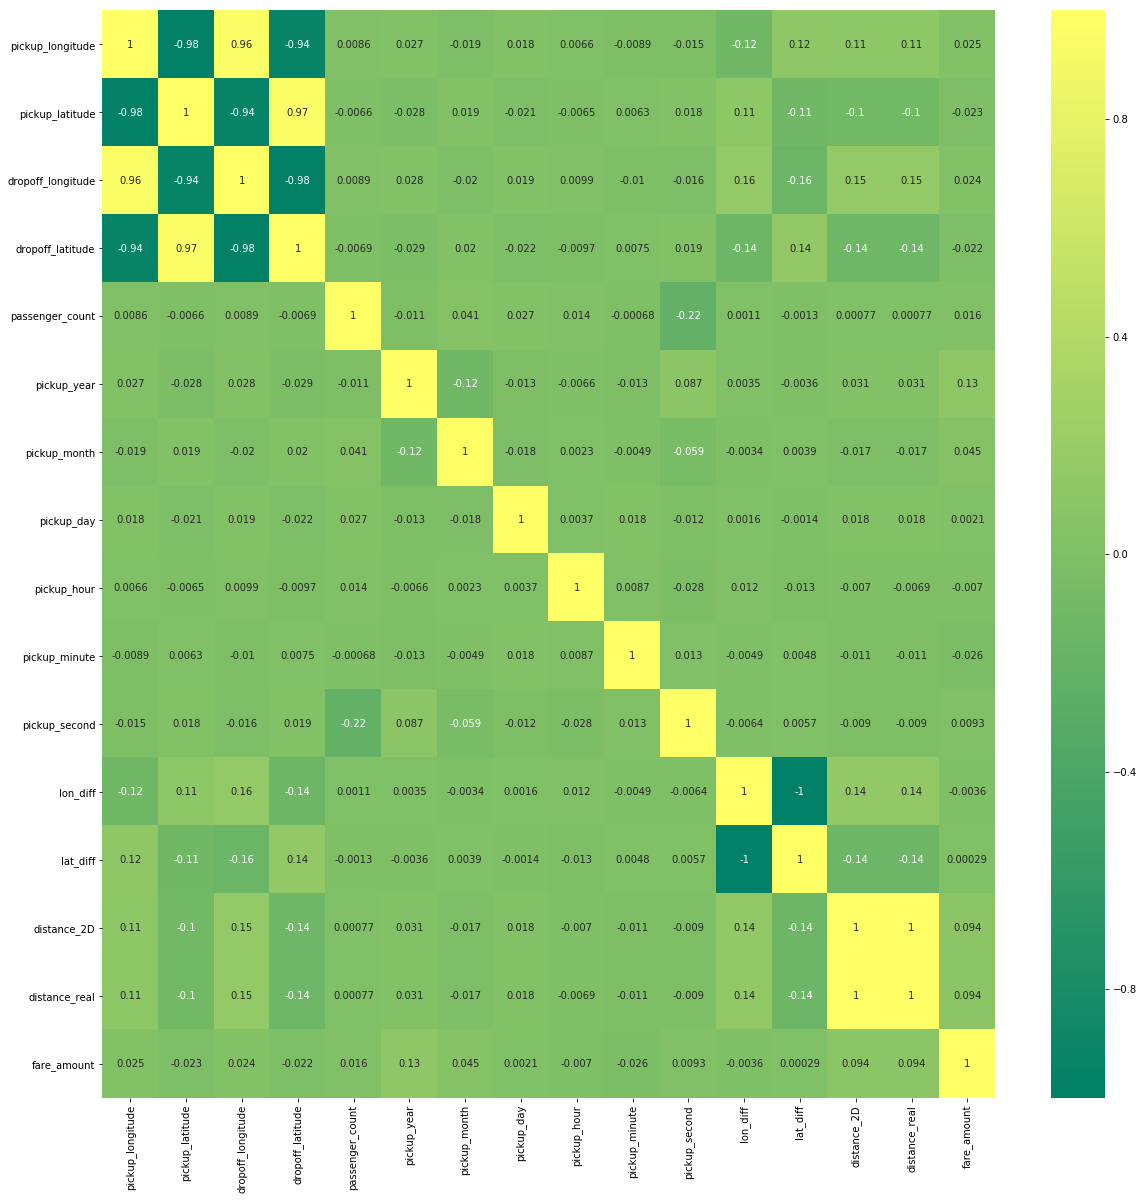

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
temp_df = pd.concat([df,train_label],axis = 1)
corr = temp_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap = plt.cm.summer , annot = True)
plt.show()

## 作業2
試著只使用新特徵估計目標值(忽略原特徵)，效果跟作業1的結果比較起來效果如何?

In [34]:
train_x = MinMaxScaler().fit_transform(df[['distance_real']])
LR = LinearRegression()
print(f' score of LR : {cross_val_score(LR,train_x,train_label,cv=5).mean()} ' )
GBR = GradientBoostingRegressor()
print(f' score of GBR : {cross_val_score(GBR,train_x,train_label,cv=5).mean()} ')

 score of LR : 0.0014467559986836014 
 score of GBR : 0.7221194640622727 


**The data with only distance_real label even has higher score than original dataset. This means the distance_label data do have high correlation with label.**

In [35]:
df = df.drop(['distance_2D'], axis = 1)
train_x = MinMaxScaler().fit_transform(df)
LR = LinearRegression()
print(f' score of LR : {cross_val_score(LR,train_x,train_label,cv=5).mean()} ' )
GBR = GradientBoostingRegressor()
print(f' score of GBR : {cross_val_score(GBR,train_x,train_label,cv=5).mean()} ')

/Users/xiejialun/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 score of LR : 0.027268703046967668 
 score of GBR : 0.8058600466947604 


**If we drop the distance_2D column, the score will incearse.**